In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
df=pd.read_csv("C:/Users/Abdelrahman/Documents/task2-EDA/multiple dataset _Copy.csv")

# Display the first few rows of the DataFrame to check the data
df.head()

,postId,comment,score,topic
0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture
1,a31ed992055111ebb86b646e69d991ea,انا لله واليه راجعون.الله ارحمو واغفر ليه.ولدو...,11,art-et-culture
2,a31ed992055111ebb86b646e69d991ea,إنا لله و إنا إليه راجعون رحم الله الفقيد و رز...,7,art-et-culture
3,a31ed992055111ebb86b646e69d991ea,إنا لله و إنا إليه راجعون. ذكريات جميلة لممثل ...,8,art-et-culture
4,a31ed992055111ebb86b646e69d991ea,نغمذ الله روح الفقيد واسكنه قسيح جناته انا لله...,6,art-et-culture


In [3]:
# Shuffle the rows of the DataFrame randomly to avoid any inherent ordering bias
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head(8)

,postId,comment,score,topic
0,4c56a452055f11eba334646e69d991ea,فاز بعصبة البطال مرتين مع الريال ومرة مع برشلو...,-8,sport
1,dc077a4a055f11eb814f646e69d991ea,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...,4,sport
2,af3fde3404f311ebaa6c646e69d991ea,"بغينا نشوفو الاعدام كيطبق في الواقع, ماشي حبر ...",167,medias
3,cc2f5836055f11eb84a3646e69d991ea,المرجو التركيز على المبارة كل في ميدانه من معد...,1,sport
4,1e03b88c055211eb8ca2646e69d991ea,من جهة وزير الخارجية المغرببة يشيد بصفقة القرن...,78,art-et-culture
5,af3fde3404f311ebaa6c646e69d991ea,هادشي مرضني منكرهش نغادر انا و وليداتي.,4,medias
6,e78a2ee6055111eb9c0e646e69d991ea,رحمها الله تعالى و رحم الله جميع البشرية ، وال...,31,art-et-culture
7,e85c0afe055f11ebadec646e69d991ea,مافهمتش ردة فعل بعض المعلقين الرجاويين اللي ما...,6,sport


In [5]:
# Drop the "postId" column from the DataFrame as it is not needed for the analysis
df.drop("postId",axis=1,inplace=True)

In [6]:
df.head()

,comment,score,topic
0,فاز بعصبة البطال مرتين مع الريال ومرة مع برشلو...,-8,sport
1,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...,4,sport
2,"بغينا نشوفو الاعدام كيطبق في الواقع, ماشي حبر ...",167,medias
3,المرجو التركيز على المبارة كل في ميدانه من معد...,1,sport
4,من جهة وزير الخارجية المغرببة يشيد بصفقة القرن...,78,art-et-culture


In [7]:
# Check the shape of the DataFrame (number of rows and columns)
df.shape

(4408, 3)

In [8]:
# Count the occurrences of each unique value in the 'topic' column
df.topic.value_counts()

sport             1521
medias            1509
art-et-culture    1378
Name: topic, dtype: int64

In [9]:
# Import necessary libraries for text preprocessing
import string , nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
# Get the list of Arabic stop words
stop_words_list = nltk.corpus.stopwords.words("arabic")
stop_words_list[:10]

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي']

In [11]:
# Define a function to clean and preprocess the text data
porter = nltk.PorterStemmer()
lemma_nltk = WordNetLemmatizer()

In [12]:
def clean_text(text):
    # Convert all words to lowercase and remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    # Lemmatize each word and remove stop words
    text = " ".join([lemma_nltk.lemmatize(word) for word in tokens if word not in stop_words_list])
    return text

In [13]:
# Apply the clean_text function to the 'comment' column and create a new 'cleaned_comments' column
df['cleaned_comments'] = df['comment'].apply(lambda x:clean_text(x))

In [14]:
df.head(8)

,comment,score,topic,cleaned_comments
0,فاز بعصبة البطال مرتين مع الريال ومرة مع برشلو...,-8,sport,فاز بعصبة البطال مرتين الريال ومرة برشلونة ومر...
1,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...,4,sport,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...
2,"بغينا نشوفو الاعدام كيطبق في الواقع, ماشي حبر ...",167,medias,بغينا نشوفو الاعدام كيطبق الواقع ماشي حبر ورق
3,المرجو التركيز على المبارة كل في ميدانه من معد...,1,sport,المرجو التركيز المبارة ميدانه معد بدني طبيب مد...
4,من جهة وزير الخارجية المغرببة يشيد بصفقة القرن...,78,art-et-culture,جهة وزير الخارجية المغرببة يشيد بصفقة القرن ين...
5,هادشي مرضني منكرهش نغادر انا و وليداتي.,4,medias,هادشي مرضني منكرهش نغادر انا وليداتي
6,رحمها الله تعالى و رحم الله جميع البشرية ، وال...,31,art-et-culture,رحمها الله تعالى رحم الله البشرية ، والرحمة تش...
7,مافهمتش ردة فعل بعض المعلقين الرجاويين اللي ما...,6,sport,مافهمتش ردة فعل المعلقين الرجاويين اللي عجبهوم...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [16]:
# Import CountVectorizer and create a Bag-of-Words (BoW) representation of the 'cleaned_comments'
bow_vec = CountVectorizer()
bow_matrix = bow_vec.fit_transform(df['cleaned_comments'])

In [17]:
# Print the sparse matrix representation of the BoW
print("Sparse Matrix \n" , bow_matrix)

Sparse Matrix 
   (0, 28495)	2
  (0, 18809)	1
  (0, 8747)	1
  (0, 35510)	2
  (0, 10914)	1
  (0, 43982)	2
  (0, 18452)	1
  (0, 39049)	1
  (0, 34189)	1
  (0, 18999)	1
  (0, 5092)	1
  (0, 32751)	1
  (0, 38716)	1
  (0, 3899)	1
  (0, 31549)	1
  (0, 12886)	1
  (0, 35443)	1
  (0, 34780)	1
  (0, 141)	1
  (0, 142)	1
  (0, 143)	1
  (1, 13462)	1
  (1, 6032)	1
  (1, 38821)	1
  (1, 37780)	1
  :	:
  (4407, 26488)	1
  (4407, 15872)	2
  (4407, 8583)	1
  (4407, 110)	1
  (4407, 12573)	1
  (4407, 9610)	1
  (4407, 23485)	1
  (4407, 33413)	2
  (4407, 20677)	1
  (4407, 34404)	1
  (4407, 26)	1
  (4407, 20973)	1
  (4407, 4395)	1
  (4407, 38102)	1
  (4407, 6616)	1
  (4407, 4152)	1
  (4407, 33349)	1
  (4407, 7235)	1
  (4407, 15686)	1
  (4407, 15243)	1
  (4407, 21107)	1
  (4407, 14659)	1
  (4407, 21201)	1
  (4407, 15549)	1
  (4407, 4153)	1


In [18]:
# Convert the sparse matrix to a dense array for easier exploration
arr_mat = bow_matrix.toarray()
arr_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# Create a new DataFrame 'data' to store the BoW representation
data = pd.DataFrame(arr_mat)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47508,47509,47510,47511,47512,47513,47514,47515,47516,47517
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Check the shape of the BoW matrix
bow_matrix.shape

(4408, 47518)

In [21]:
# Import CountVectorizer and create a n-gram representation of the 'cleaned_comments'
ngram_vec = CountVectorizer(ngram_range=(1,2))
ngram_matrix = ngram_vec.fit_transform(df['cleaned_comments'])

In [22]:
# Print the sparse matrix representation of the n-grams
print("Sparse Matrix is \n" , ngram_matrix)

Sparse Matrix is 
   (0, 112447)	2
  (0, 77015)	1
  (0, 30435)	1
  (0, 136022)	2
  (0, 40539)	1
  (0, 161686)	2
  (0, 75817)	1
  (0, 147958)	1
  (0, 131614)	1
  (0, 77634)	1
  (0, 17239)	1
  (0, 127432)	1
  (0, 147115)	1
  (0, 13216)	1
  (0, 123659)	1
  (0, 50222)	1
  (0, 135741)	1
  (0, 133502)	1
  (0, 496)	1
  (0, 498)	1
  (0, 500)	1
  (0, 112456)	1
  (0, 77017)	1
  (0, 30436)	1
  (0, 136024)	1
  :	:
  (4407, 33898)	1
  (4407, 29782)	1
  (4407, 62360)	1
  (4407, 92970)	1
  (4407, 84252)	1
  (4407, 58873)	1
  (4407, 65568)	1
  (4407, 84548)	1
  (4407, 132302)	1
  (4407, 171301)	1
  (4407, 14928)	1
  (4407, 144853)	1
  (4407, 129241)	1
  (4407, 63695)	1
  (4407, 64148)	1
  (4407, 14079)	1
  (4407, 122)	1
  (4407, 22178)	1
  (4407, 65562)	1
  (4407, 82955)	1
  (4407, 14082)	1
  (4407, 48449)	1
  (4407, 129016)	1
  (4407, 83825)	1
  (4407, 129242)	1


In [23]:
# Create a new DataFrame 'feature_ngram' to store the n-gram representation
feature_ngram = pd.DataFrame(ngram_matrix.toarray())
feature_ngram.head()

,0,1,2,3,4,5,6,7,8,9,...,173310,173311,173312,173313,173314,173315,173316,173317,173318,173319
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Import TfidfVectorizer and create a TF-IDF representation of the 'cleaned_comments'
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['cleaned_comments'])

In [25]:
# Print the sparse matrix representation of TF-IDF
print("Sparse Matrix \n",tfidf_matrix)

Sparse Matrix 
   (0, 143)	0.2109311738947064
  (0, 142)	0.2109311738947064
  (0, 141)	0.2109311738947064
  (0, 34780)	0.201098716540103
  (0, 35443)	0.1674813228012507
  (0, 12886)	0.1805518928743748
  (0, 31549)	0.12087770628689459
  (0, 3899)	0.13889914703428463
  (0, 38716)	0.2109311738947064
  (0, 32751)	0.2109311738947064
  (0, 5092)	0.15391073865034524
  (0, 18999)	0.201098716540103
  (0, 34189)	0.201098716540103
  (0, 39049)	0.12969659064333455
  (0, 18452)	0.16959133334594995
  (0, 43982)	0.3611037857487496
  (0, 10914)	0.17190258839514053
  (0, 35510)	0.3774225705291334
  (0, 8747)	0.2109311738947064
  (0, 18809)	0.201098716540103
  (0, 28495)	0.3241402620810743
  (1, 32242)	0.3358304343353762
  (1, 5142)	0.22017542981386098
  (1, 38933)	0.25894995182873976
  (1, 33659)	0.18213664629980228
  :	:
  (4407, 15549)	0.21277627102778568
  (4407, 21201)	0.21277627102778568
  (4407, 14659)	0.21277627102778568
  (4407, 21107)	0.21277627102778568
  (4407, 15243)	0.21277627102778568
  (

In [26]:
# Create a new DataFrame 'feature_tfidf' to store the TF-IDF representation
feature_tfidf = pd.DataFrame(tfidf_matrix.toarray())
feature_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,47508,47509,47510,47511,47512,47513,47514,47515,47516,47517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Set column names in 'feature_tfidf' to the corresponding feature names from the TF-IDF vectorizer
feature_tfidf.columns = tfidf.get_feature_names_out()
feature_tfidf.head()

,000,01,03,04092020,06,10,100,1000,10000,100000,...,ݣاوريات,ﻷلبيساء,ﻹبتداية,ﻹجراء,ﻻجل,ﻻموال,ﻻن,ﻻنه,ﻻية,ﻻيمكن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.head()

,comment,score,topic,cleaned_comments
0,فاز بعصبة البطال مرتين مع الريال ومرة مع برشلو...,-8,sport,فاز بعصبة البطال مرتين الريال ومرة برشلونة ومر...
1,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...,4,sport,اللهم ارحمه وأكرم نزله وآنس وحشته،إنا لله وإنا...
2,"بغينا نشوفو الاعدام كيطبق في الواقع, ماشي حبر ...",167,medias,بغينا نشوفو الاعدام كيطبق الواقع ماشي حبر ورق
3,المرجو التركيز على المبارة كل في ميدانه من معد...,1,sport,المرجو التركيز المبارة ميدانه معد بدني طبيب مد...
4,من جهة وزير الخارجية المغرببة يشيد بصفقة القرن...,78,art-et-culture,جهة وزير الخارجية المغرببة يشيد بصفقة القرن ين...


In [29]:
# Create a copy of the TF-IDF matrix for later use
matrix_tfidf = feature_tfidf.copy()
matrix_tfidf

,000,01,03,04092020,06,10,100,1000,10000,100000,...,ݣاوريات,ﻷلبيساء,ﻹبتداية,ﻹجراء,ﻻجل,ﻻموال,ﻻن,ﻻنه,ﻻية,ﻻيمكن
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Extract features (TF-IDF representation) 'x' and target variable 'y' from the DataFrame
x = matrix_tfidf
y = df['topic']

In [31]:
# Standardize the feature matrix 'x' using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
from sklearn.model_selection import *

In [33]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
# Create a Logistic Regression model with multinomial classification and lbfgs solver
from sklearn.linear_model import LogisticRegression

In [35]:
log_model = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [36]:
# Train the Logistic Regression model on the training data
log_model.fit(x_train , y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
# Make predictions on the test data using the trained model
y_pred = log_model.predict(x_test)
# Display the first 6 predicted labels
y_pred[:6]

array(['medias', 'art-et-culture', 'art-et-culture', 'sport',
       'art-et-culture', 'sport'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [39]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[165,  46,  69],
       [ 19, 201,  64],
       [  8,  11, 299]], dtype=int64)

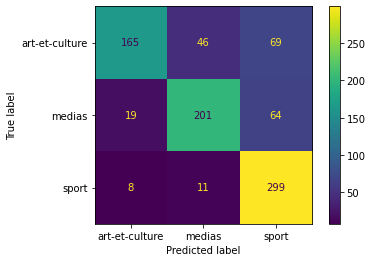

In [40]:
# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=log_model.classes_)
disp.plot()

In [41]:
# Calculate and print the accuracy of the model on the test data
acc = accuracy_score(y_test,y_pred)
acc

0.753968253968254

In [42]:
from sklearn.metrics import classification_report

In [43]:
# Generate and print a classification report with precision, recall, F1-score, and support
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

art-et-culture       0.86      0.59      0.70       280
        medias       0.78      0.71      0.74       284
         sport       0.69      0.94      0.80       318

      accuracy                           0.75       882
     macro avg       0.78      0.75      0.75       882
  weighted avg       0.77      0.75      0.75       882

